![Alt text](Do_Apples_Affect_Diabetes_and_Blood_Sugar_Levels-732x549-thumbnail-1-732x549.avif)


Headers :

* index: The index of the dataframe.
* A_id: The ID of the item.
* Size: The size of the item in some unit of measurement.
* Weight: The weight of the item in some unit of measurement.
* Sweetness: The level of sweetness of the item on a scale from very sweet to very sour.
* Crunchiness: The level of crunchiness of the item on a scale from very soft to very crunchy.
* Juiciness: The level of juiciness of the item on a scale from very dry to very juicy.
* Ripeness: The level of ripeness of the item on a scale from unripe to overripe.
* Acidity: The level of acidity of the item on a scale from very low to very high.
* Quality: The overall quality rating of the item, either "good" or "bad".

In [232]:
# importing necessary libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import confusion_matrix

## Reading dataset

In [194]:
df = pd.read_csv('apple_quality.csv')

In [195]:
df.shape

(4001, 9)

In [196]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [197]:
df.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object

## Cleaning the data

In [198]:
# converting acidity to float64
# we discovered a row with an invalid data

df.dropna(inplace=True)

df['Acidity'] = df['Acidity'].astype(float)

In [217]:
df.drop(labels = ['A_id'], axis = 1, inplace = True)

In [218]:
df.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,3538.000000,3538.000000,3538.000000,3538.000000,3538.000000,3538.000000,3538.000000
mean,-0.498460,-0.951505,-0.480977,0.990145,0.482293,0.546076,0.047154
std,1.853067,1.454644,1.805121,1.252756,1.768764,1.707482,1.947610
min,-7.151703,-4.707898,-4.980916,-2.324094,-4.126255,-3.651885,-4.534760
25%,-1.776193,-1.903875,-1.708719,0.131493,-0.785065,-0.661690,-1.365683
50%,-0.500080,-0.942134,-0.520887,1.009827,0.493630,0.535844,0.014779
75%,0.772123,0.020418,0.758502,1.853409,1.735006,1.741803,1.429879
max,6.406367,2.831243,4.079123,4.326437,4.636005,4.755782,5.098354


In [200]:
df.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [201]:
df['A_id'].duplicated().sum()

0

In [202]:
plots = ['Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity']

In [203]:
# Reomivng outliers
for i in plots:
    df = df[(df[i] <= df[i].quantile(0.99)) & (df[i] >= df[i].quantile(0.01))]

In [204]:
df.shape

(3538, 9)

## EDA

In [250]:
# Count of good and bad apples

Quality_count = df['Quality'].value_counts()
pd.DataFrame(Quality_count)

,count
Quality,
bad,1784
good,1754


<Figure size 2000x2000 with 0 Axes>

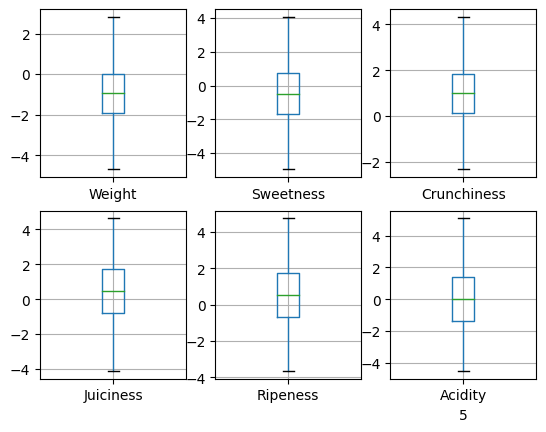

In [249]:
# boxplot showing outliers have been handled

plt.figure(figsize=(20,20))
fig, ax = plt.subplots( nrows=2, \
    ncols=3)
ax = ax.flatten()
for i, column in enumerate(plots):
    axes = ax[i]
    df.boxplot(column = column, ax= axes)
    plt.xlabel(i)
plt.show()

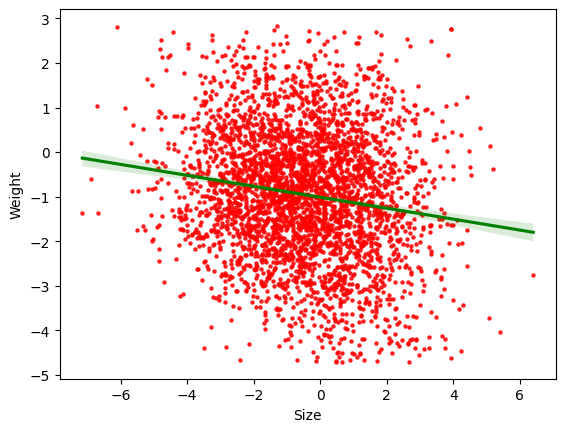

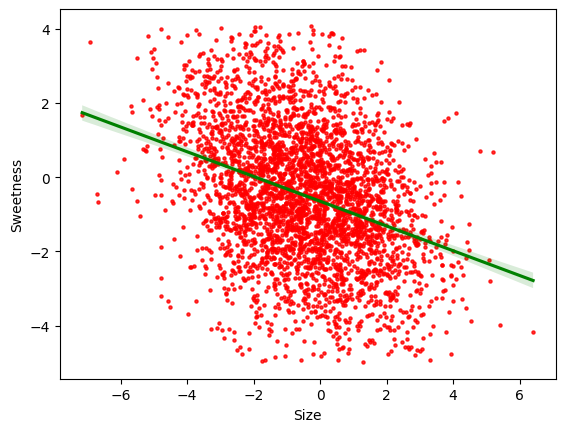

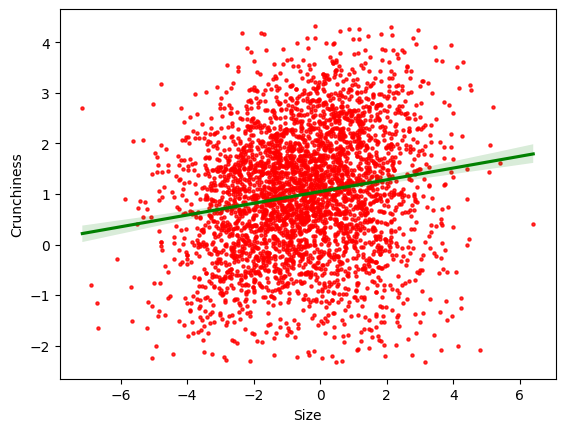

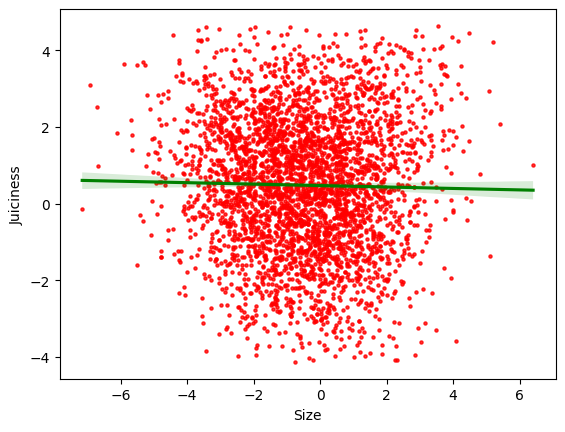

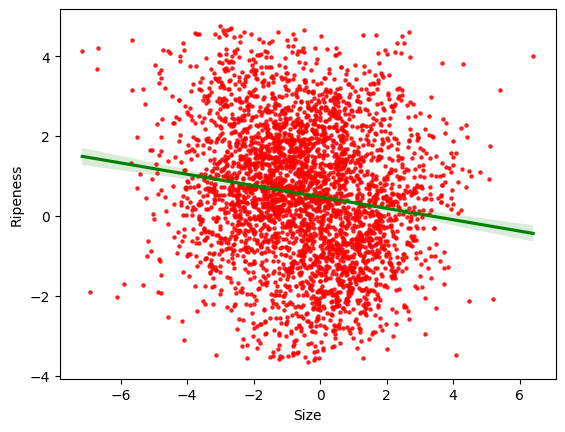

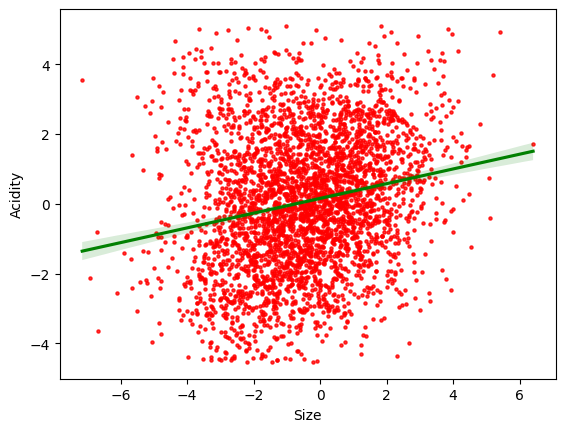

In [207]:
# Regression plot of descriptive variables against size

for i in plots:

    fig, ax = plt.subplots()
    sns.regplot(data = df, x = 'Size', y = i, ax = ax, line_kws={'color':'green'}, scatter_kws={'color':'red', 'marker':'.','s':5})
    plt.show()


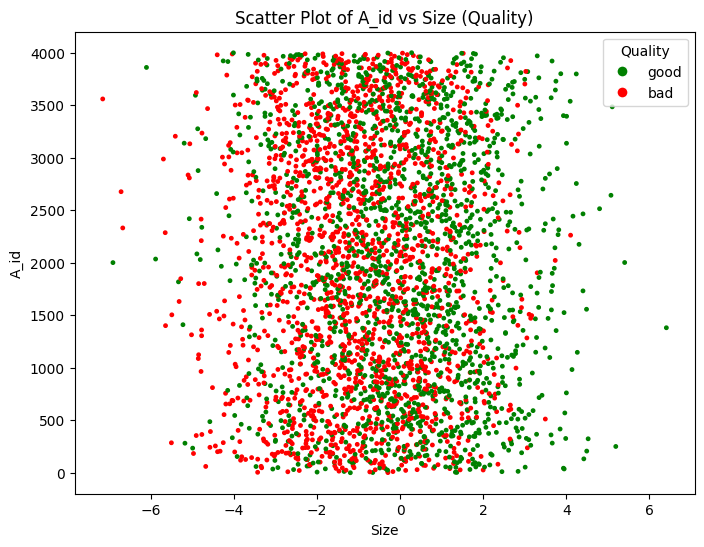

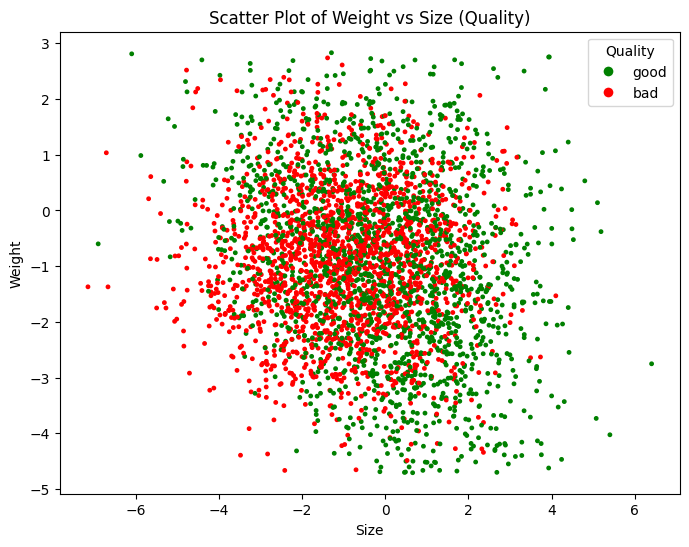

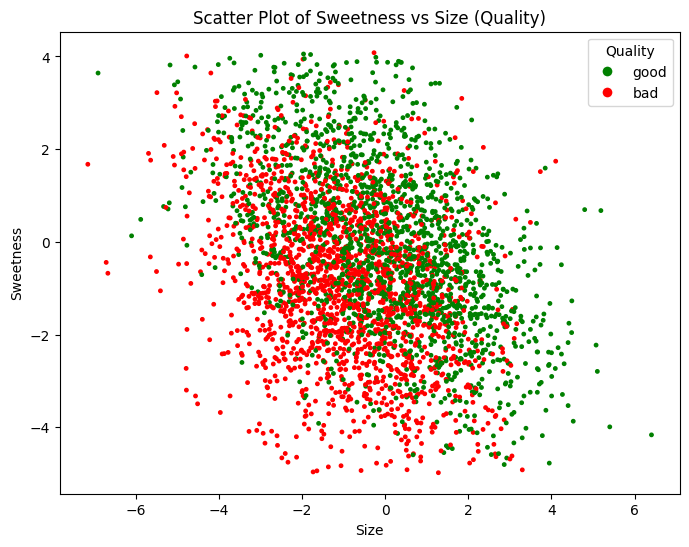

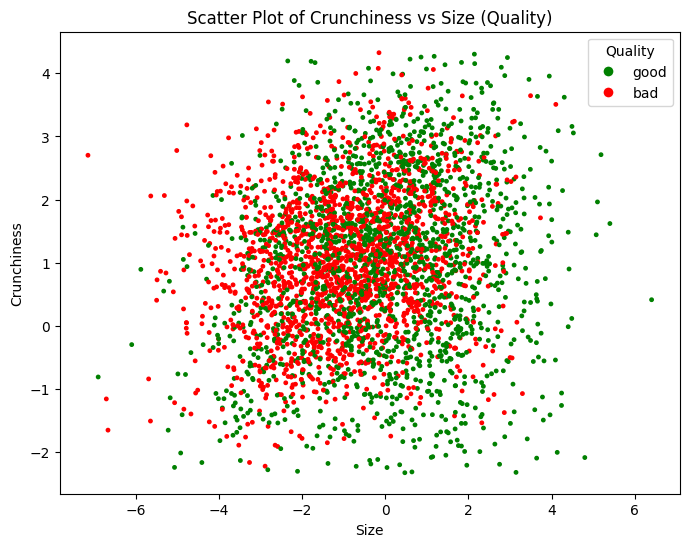

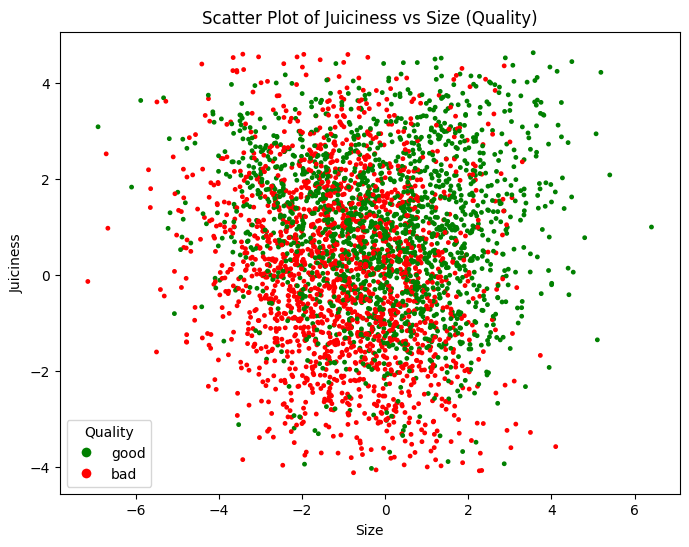

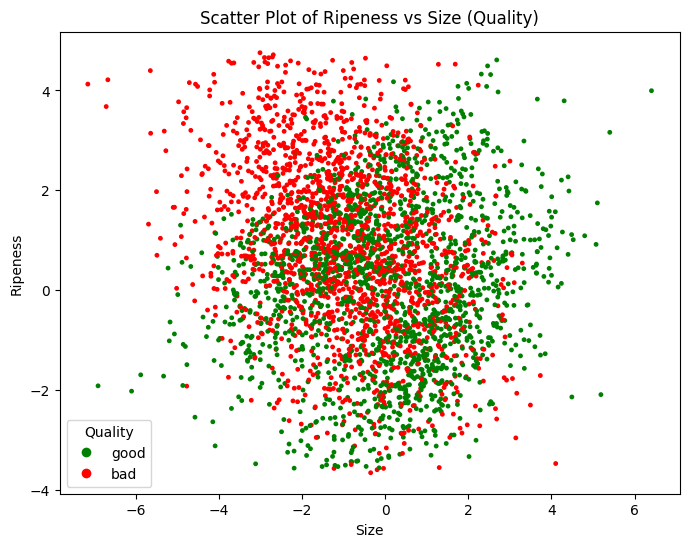

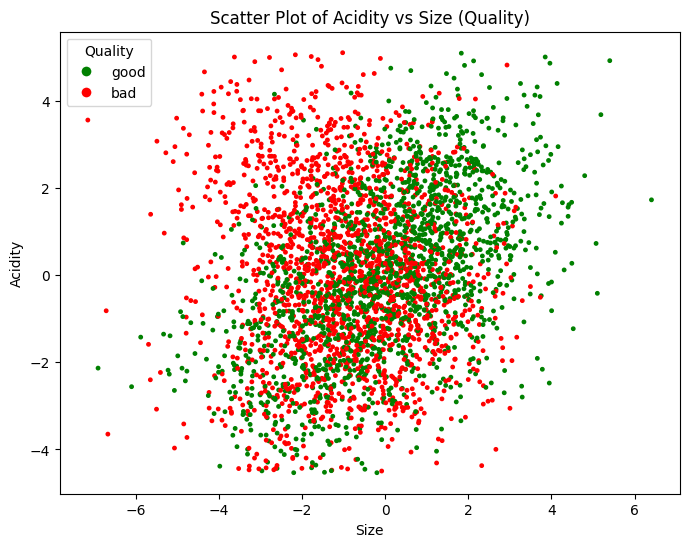

In [208]:
# creating scatter plot to see the relationships with sze and quality
# Define colors for different qualities
colors = {'good': 'green', 'bad': 'red'}

# Iterate through each column (except 'Size')
for column in df.columns[:-1]:
    if column != 'Size':
        # Create a scatter plot
        plt.figure(figsize=(8, 6))
        plt.scatter(df['Size'], df[column], c=[colors[label] for label in df['Quality']], s=6)
        plt.title(f"Scatter Plot of {column} vs Size (Quality)")
        plt.xlabel("Size")
        plt.ylabel(column)
        
        # Create custom legend for the colored points
        legend_elements = [
            plt.Line2D([0], [0], marker='o', color='w', label='good', markerfacecolor='green', markersize=8),
            plt.Line2D([0], [0], marker='o', color='w', label='bad', markerfacecolor='red', markersize=8)
        ]
        plt.legend(handles=legend_elements, title='Quality')
        
        plt.show()


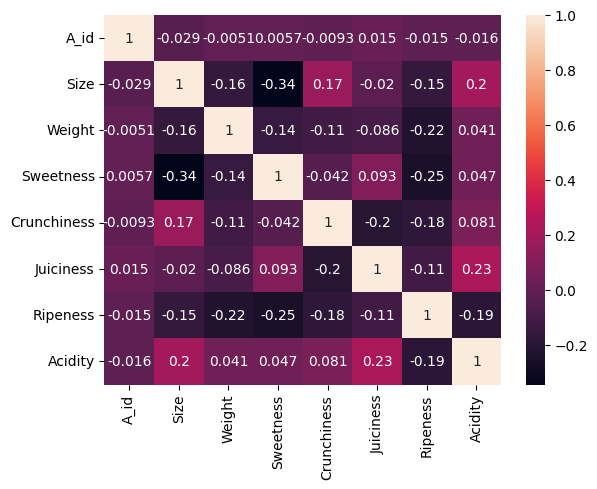

In [209]:
# Creating a correlation heatmap


sns.heatmap(df.corr(numeric_only = True), annot=True)

plt.show()

## Model testing

In [210]:
# encoding a label to our dependent variable
df_copy = df.copy()
label = LabelEncoder()
df_copy['Quality_label'] = label.fit_transform(df_copy['Quality'])
df_copy.drop('Quality', axis = 1, inplace = True)
label.classes_

array(['bad', 'good'], dtype=object)

In [211]:
X = df_copy[df_copy.columns[:-1]]       # Independent variables
y = df_copy[df_copy.columns[-1]]        # Dependent variables

In [212]:
# converting data to scale of 0 to 1

scaler = MinMaxScaler()    # first steo to initialize the MinMaxScaler

cols = X.columns
x = pd.DataFrame(scaler.fit_transform(x))    # fit and transform scaler to data
x.columns = cols                             # replaces the numbers generated for columns to the original column names

In [213]:
# splitting the data to train and test model

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=2)

In [221]:
# performance of different models on test and train data

lazy = LazyClassifier(predictions=True)    #initiating LazyClassifier
summary, predictions = lazy.fit(x_train, x_test, y_train, y_test)

print(summary)

 97%|█████████▋| 28/29 [00:16<00:00,  1.64it/s]

[LightGBM] [Info] Number of positive: 1231, number of negative: 1245
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000499 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 2476, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497173 -> initscore=-0.011309
[LightGBM] [Info] Start training from score -0.011309


100%|██████████| 29/29 [00:17<00:00,  1.67it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.89,0.89,0.89,0.89,1.12
RandomForestClassifier,0.88,0.88,0.88,0.88,4.50
SVC,0.88,0.88,0.88,0.88,0.55
LGBMClassifier,0.88,0.88,0.88,0.88,0.96
XGBClassifier,0.88,0.88,0.88,0.88,1.34
NuSVC,0.87,0.87,0.87,0.87,0.89
KNeighborsClassifier,0.86,0.86,0.86,0.86,0.55
QuadraticDiscriminantAnalysis,0.86,0.86,0.86,0.86,0.08
BaggingClassifier,0.85,0.85,0.85,0.85,1.16


In [235]:
# top 5 model predictions of apple quality

top5 = summary.index[:5]
top5pred = predictions[top5]

,ExtraTreesClassifier,RandomForestClassifier,SVC,LGBMClassifier,XGBClassifier
0,1,1,1,1,1
1,1,1,1,1,1
2,0,0,0,0,1
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
1057,0,0,0,0,0
1058,1,1,1,1,1
1059,1,1,1,1,1
1060,1,1,1,1,1


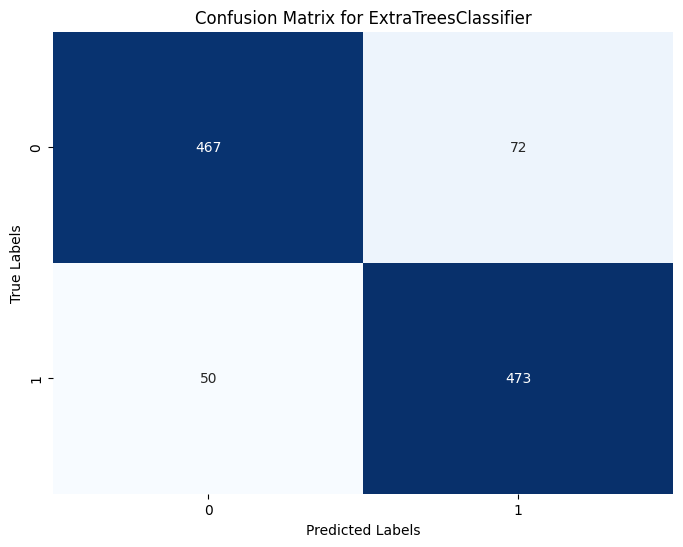

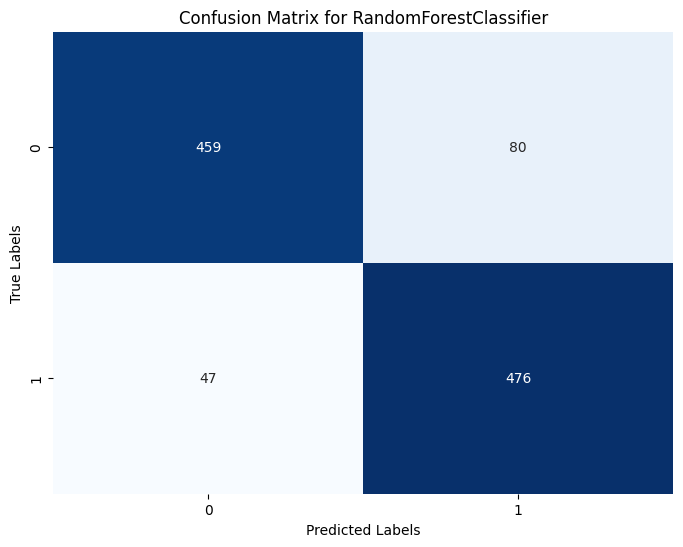

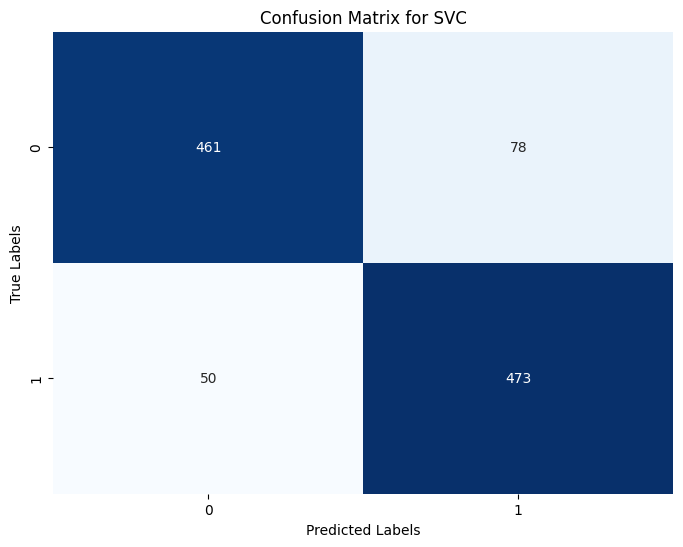

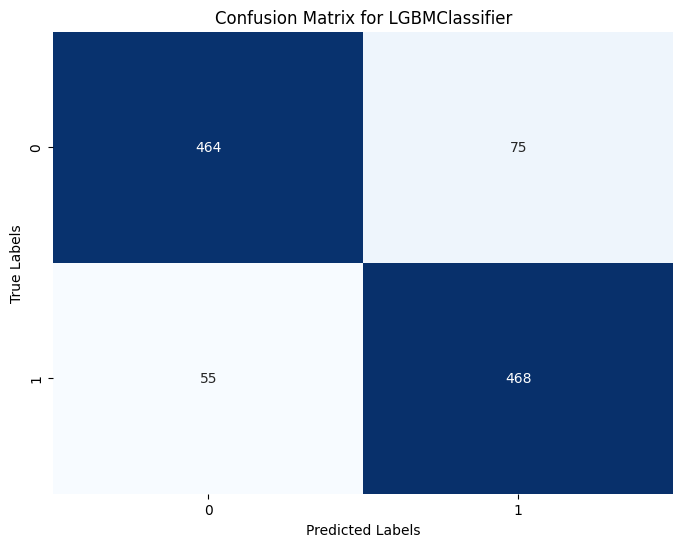

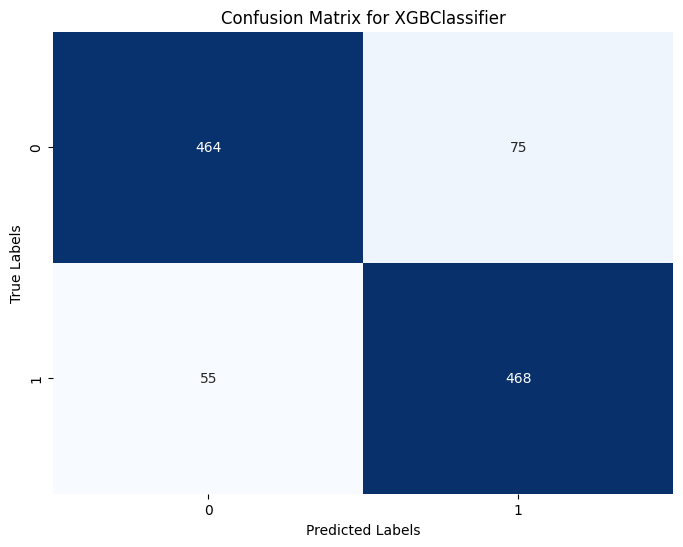

In [244]:
# confusion matrix with True Negative, False Positive, False Negative and True Positive  

for i in range(5):
    y_pred = top5pred.iloc[:,i]
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # Visualize confusion matrix as heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {top5pred.columns[i]}')
    plt.show()

In [230]:
y_test

26      1
1589    1
3986    1
3074    0
116     0
       ..
1504    0
651     1
1199    0
2427    1
2681    1
Name: Quality_label, Length: 1062, dtype: int32